# Householder QR Factorization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialization
np.random.seed(43)
A = np.random.randint(-9,9,[4,3])*1.
#A = np.array([[1,2,3],[4,5,6],[7,8,7],[4,2,3],[4,2,2]])*1.
m, n = A.shape
Rtemp = A.copy()
R = np.eye(m,n)
Q = np.eye(m)
print('A = \n{}'.format(A))

A = 
[[-5. -9.  8.]
 [ 7.  8. -7.]
 [ 5. -9. -6.]
 [ 2. -8.  6.]]


In [4]:
# Householder Vector
x = Rtemp[:,0]
e1 = np.eye(len(x))[:,0]
beta = np.linalg.norm(x)
v = np.sign(x)*beta*e1 + x
print('v = {}'.format(v))

v = [-15.14889157   7.           5.           2.        ]


In [6]:
# First Iteration
#R = H1*A
H = np.eye(m) - 2*np.outer(v,v)/np.dot(v,v)
print('H = \n{}'.format(H))
Rtemp = H.dot(Rtemp)
R[:1,0] = Rtemp[:1,0]
Q = Q.dot(H)
print('R = H*A = \n{}'.format(Rtemp))

H = 
[[-0.49266464  0.68973049  0.49266464  0.19706586]
 [ 0.68973049  0.68128932 -0.22765048 -0.09106019]
 [ 0.49266464 -0.22765048  0.83739251 -0.06504299]
 [ 0.19706586 -0.09106019 -0.06504299  0.9739828 ]]
R = H*A = 
[[-5. -9.  8.]
 [ 7.  8. -7.]
 [ 5. -9. -6.]
 [ 2. -8.  6.]]


In [6]:
# Householder Vector
x = Rtemp[1:,1]
e1 = np.eye(len(x))[:,0]
beta = np.linalg.norm(x)
v = np.sign(x)*beta*e1 + x
print('v = {}'.format(v))

v = [ 18.58709204 -13.27137426  -9.70854971]


In [7]:
# Second Iteration
#R = H2*H1*A
H = np.eye(m)
H[1:,1:] = np.eye(m-1) - 2*np.outer(v,v)/np.dot(v,v)
print('H2 = \n{}'.format(H))
Rtemp = H.dot(Rtemp)
R[:2,1] = Rtemp[:2,1]
Q = Q.dot(H)
print('H2*H1*A = \n{}'.format(Rtemp))

H2 = 
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.12193361  0.8010721   0.5860168 ]
 [ 0.          0.8010721   0.42802631 -0.418422  ]
 [ 0.          0.5860168  -0.418422    0.6939073 ]]
H2*H1*A = 
[[ 1.01488916e+01  3.94131711e+00 -1.05430233e+01]
 [ 4.77518686e-17 -1.65670160e+01  4.85582931e+00]
 [ 1.87949281e-16  0.00000000e+00 -2.22702904e+00]
 [-2.46986720e-16 -8.88178420e-16  6.73096750e+00]]


In [8]:
# Householder Vector
x = Rtemp[2:,2]
e1 = np.eye(len(x))[:,0]
beta = np.linalg.norm(x)
v = np.sign(x)*beta*e1 + x
print('v = {}'.format(v))

v = [-9.31685146  6.7309675 ]


In [9]:
# Third Iteration
#R = H3*H2*H1*A
H = np.eye(m)
H[2:,2:] = np.eye(m-2) - 2*np.outer(v,v)/np.dot(v,v)
print('H3 = \n{}'.format(H))
Rtemp = H.dot(Rtemp)
R[:3,2] = Rtemp[:3,2]
Q = Q.dot(H)
print('H3*H2*H1*A = \n{}'.format(Rtemp))

H3 = 
[[ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.         -0.31411634  0.9493845 ]
 [ 0.          0.          0.9493845   0.31411634]]
H3*H2*H1*A = 
[[ 1.01488916e+01  3.94131711e+00 -1.05430233e+01]
 [ 4.77518686e-17 -1.65670160e+01  4.85582931e+00]
 [-2.93523303e-16 -8.43222824e-16  7.08982242e+00]
 [ 1.00853571e-16 -2.78991351e-16  4.44089210e-16]]


In [11]:
q,r = np.linalg.qr(A) # reduced
#q,r = np.linalg.qr(A,mode='complete')
print('Q = \n{}'.format(Q))
print('R = \n{}'.format(R))
print('QR = \n{}'.format(np.dot(Q,R)))
print('A = \n{}'.format(A))
print('NumPy Q = \n{}'.format(q))
print('NumPy R = \n{}'.format(r))

Q = 
[[-0.49266464  0.42604247  0.10395687  0.75163977]
 [ 0.68973049 -0.31879932  0.25668904  0.59728517]
 [ 0.49266464  0.66045373 -0.56600513  0.02684428]
 [ 0.19706586  0.52976945  0.77649334 -0.27850938]]
R = 
[[ 10.14889157   3.94131711 -10.54302328]
 [  0.         -16.56701601   4.85582931]
 [  0.           0.           7.08982242]
 [  0.           0.           0.        ]]
QR = 
[[-5. -9.  8.]
 [ 7.  8. -7.]
 [ 5. -9. -6.]
 [ 2. -8.  6.]]
A = 
[[-5. -9.  8.]
 [ 7.  8. -7.]
 [ 5. -9. -6.]
 [ 2. -8.  6.]]
NumPy Q = 
[[-0.49266464  0.42604247  0.10395687  0.75163977]
 [ 0.68973049 -0.31879932  0.25668904  0.59728517]
 [ 0.49266464  0.66045373 -0.56600513  0.02684428]
 [ 0.19706586  0.52976945  0.77649334 -0.27850938]]
NumPy R = 
[[ 10.14889157   3.94131711 -10.54302328]
 [  0.         -16.56701601   4.85582931]
 [  0.           0.           7.08982242]
 [  0.           0.           0.        ]]


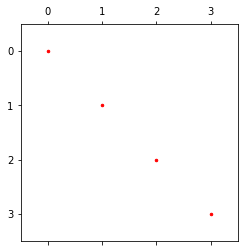

In [18]:
plt.spy(np.dot(Q,Q.T),precision=3.0e-16,marker='.',markersize=5,color='r');